## Heat Diffusion

The Laplace operator is a second-order differential operator defined as the divergence $(\nabla \cdot)$ of the gradient $(\nabla f)$. Then the Laplacian of $f$ is the real-valued function defined by:

$$\Delta f = \nabla^{2} f = \nabla \cdot \nabla f$$

For any given value of $t$, the right-hand side of the heat equation is the Laplacian of the function $u(\cdot, t) : U \rightarrow R$. As such, the heat equation is often written as:

$$\frac{\partial u}{\partial t} = \Delta u$$

In the context of engineering and physics, it is better expressed as:

$$\frac{\partial U}{\partial t} = D \left(\frac{\partial^{2}U}{\partial x^{2}} + \frac{\partial^{2}U}{\partial y^{2}}\right)$$

where $D$ is the diffusion coefficient. Applying finite difference approximations yields: 

$$\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t} = D \left(\frac{u_{i+1,j}^{n} -2 u_{i,j}^{n} + u_{i-1,j}^{n}}{(\Delta x )^{2}} + \frac{u_{i,j+1}^{n} -2 u_{i,j}^{n} + u_{i,j-1}^{n}}{(\Delta y )^{2}}\right)$$

Therefore, we aim to solve the last equation by applying finite difference method: forward-difference in time and central-difference in space.

### System setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append('../src/')

### Parameters

#### Define initial condition

In [3]:
from initial_condition import InitialCondition
ic = InitialCondition()
ic.rectangle(tx=15, ty=10)
ic.circle(r=0.8)
u0 = ic.u0

<AxesSubplot:>

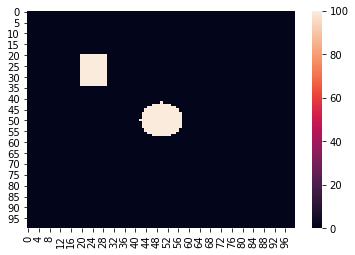

In [4]:
sns.heatmap(ic.u0)

### Heat Diffusion (transient)

#### First scenario

In [5]:
from heat_diffusion import timesteps

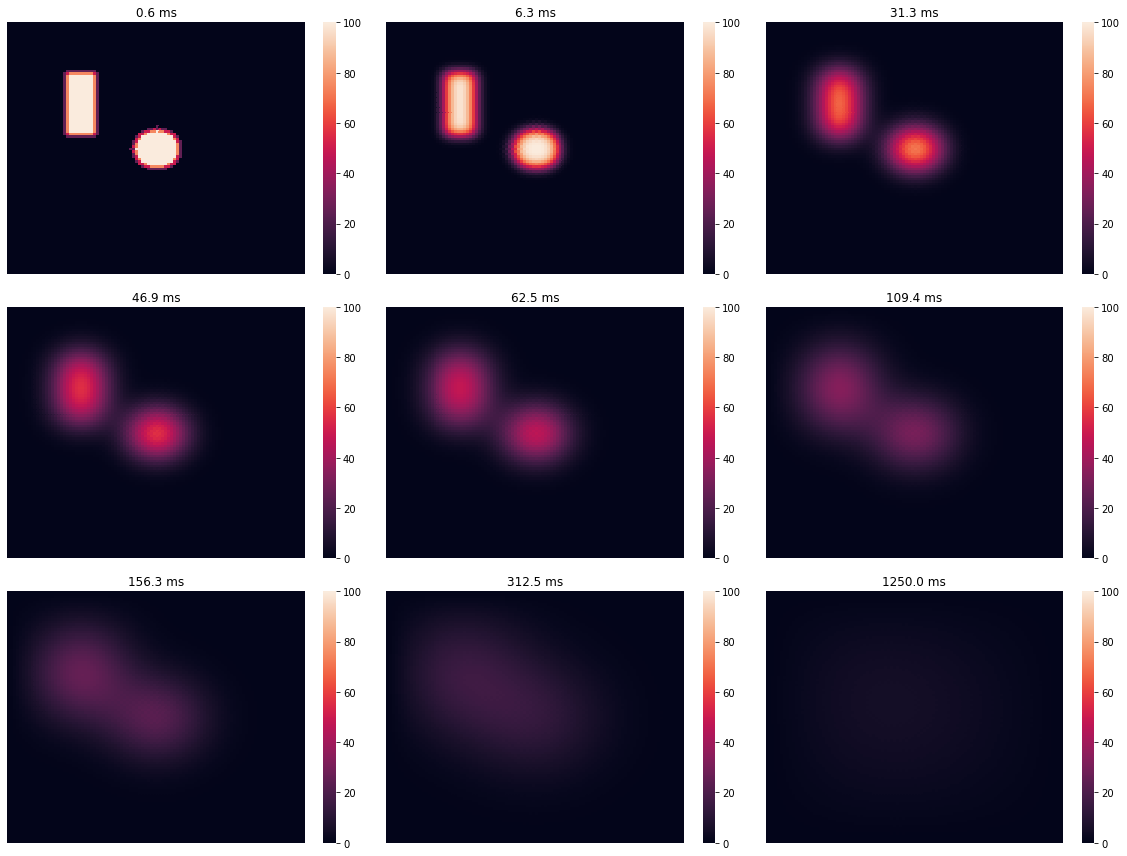

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))

ax = ax.ravel()

for i, nstep in enumerate([1, 10, 50, 75, 100, 175, 250, 500, 2000]):
    ic = InitialCondition()
    ic.rectangle(tx=25, ty=10)
    ic.circle(r=0.8)
    u0 = ic.u0
    u, u0, dt = timesteps(u0, nsteps=nstep)
    sns.heatmap(u0, ax=ax[i], vmin=0, vmax=100)
    ax[i].set_axis_off()
    ax[i].set_title('{:.1f} ms'.format(nstep * dt * 1000))
fig.tight_layout()

#### Second scenario

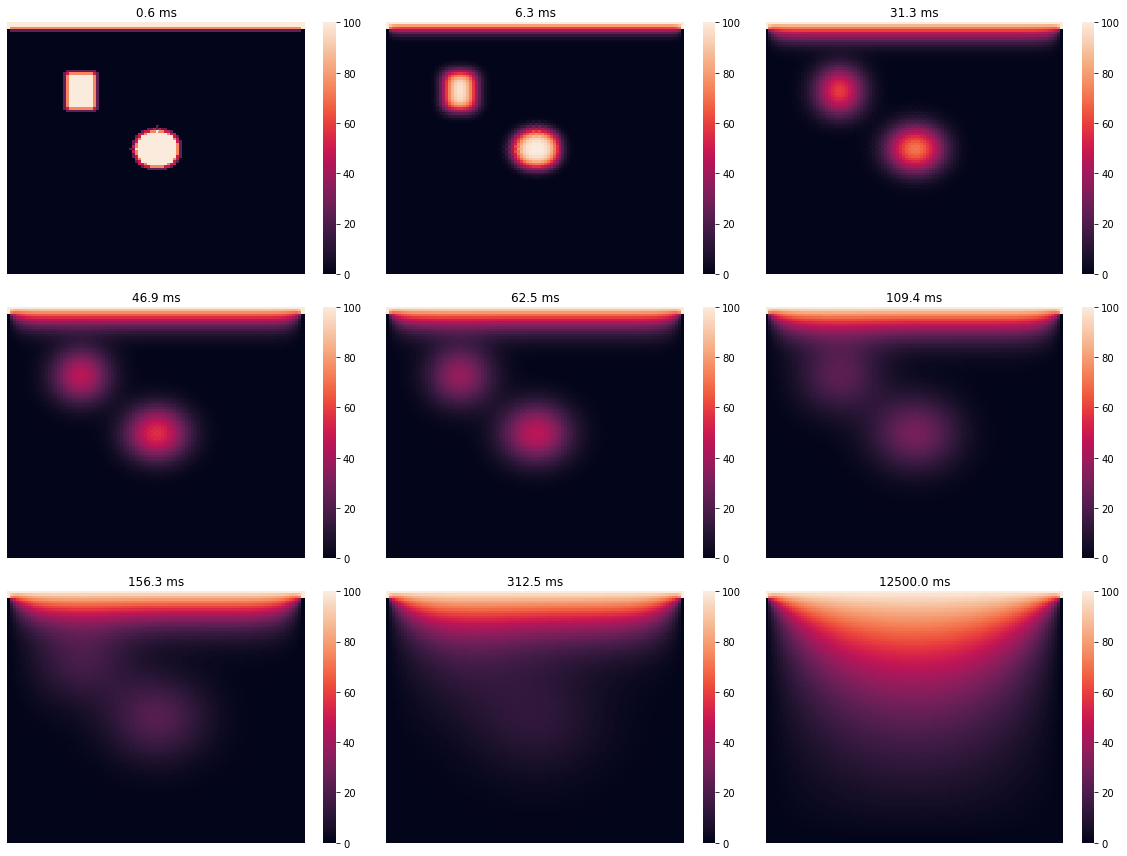

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12))

ax = ax.ravel()

for i, nstep in enumerate([1, 10, 50, 75, 100, 175, 250, 500, 20000]):
    ic = InitialCondition()
    ic.border(t=3)
    ic.rectangle(tx=15, ty=10)
    ic.circle(r=0.8)
    u0 = ic.u0
    u, u0, dt = timesteps(u0, nsteps=nstep)
    sns.heatmap(u0, ax=ax[i], vmin=0, vmax=100)
    ax[i].set_axis_off()
    ax[i].set_title('{:.1f} ms'.format(nstep * dt * 1000))
fig.tight_layout()

#### Third scenario

CPU times: user 38.2 s, sys: 1.61 s, total: 39.8 s
Wall time: 48.8 s


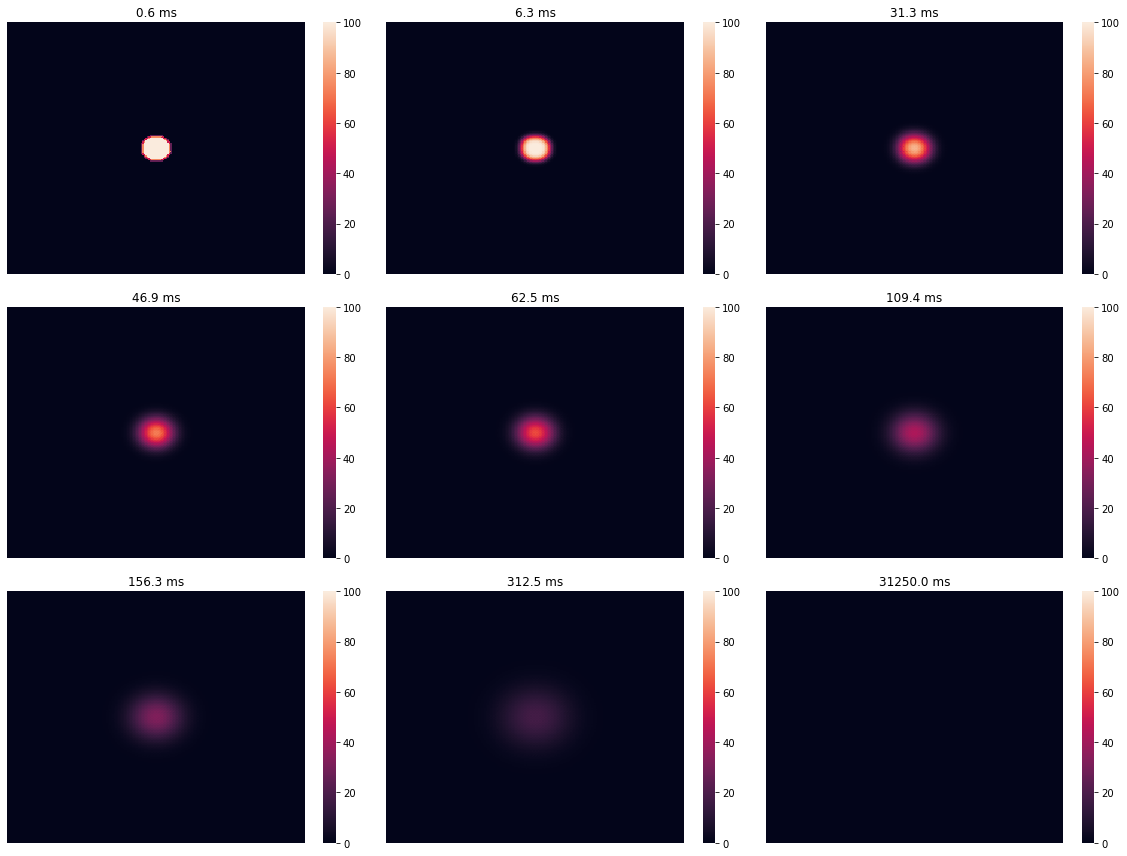

In [8]:
%%time
fig, ax = plt.subplots(3, 3, figsize=(16, 12))

ax = ax.ravel()

for i, nstep in enumerate([1, 10, 50, 75, 100, 175, 250, 500, 50000]):
    ic = InitialCondition(dx=0.05, dy=0.05)
    ic.circle(r=0.5)
    u0 = ic.u0
    u, u0, dt = timesteps(u0, nsteps=nstep)
    sns.heatmap(u0, ax=ax[i], vmin=0, vmax=100)
    ax[i].set_axis_off()
    ax[i].set_title('{:.1f} ms'.format(nstep * dt * 1000))
fig.tight_layout()